In [1]:
import napari
from skimage.io import imread
from skimage.morphology import disk, ball
from skimage.filters.rank import gradient
import pandas as pd

In [2]:
image = imread('blobs.tif')
image.shape

(254, 256)

In [3]:
viewer = napari.Viewer()

viewer.add_image(image, colormap='green', blending='additive')

viewer.add_image(gradient(image, disk(5)), name='gradient', colormap='magenta', blending='additive')

viewer.add_shapes([[ 100,80], [140, 150]], shape_type='path', edge_color='cyan', edge_width=3)

<Shapes layer 'Shapes' at 0x29058191be0>

In [4]:
from napari_plot_profile import PlotProfile
profiler = PlotProfile(viewer)
viewer.window.add_dock_widget(profiler, area='right')

In [5]:
viewer.camera.zoom = 3

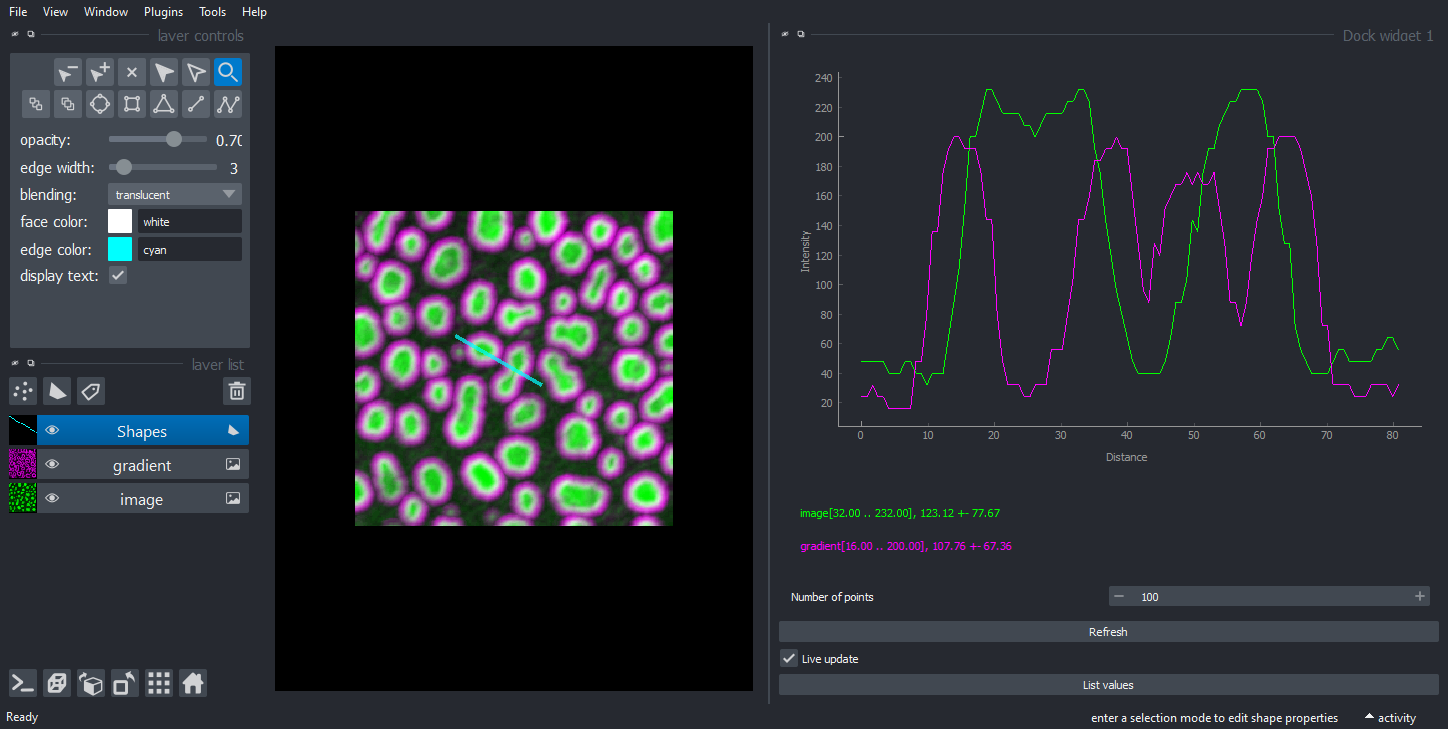

In [6]:
napari.utils.nbscreenshot(viewer)

In [7]:
profiler._list_values()

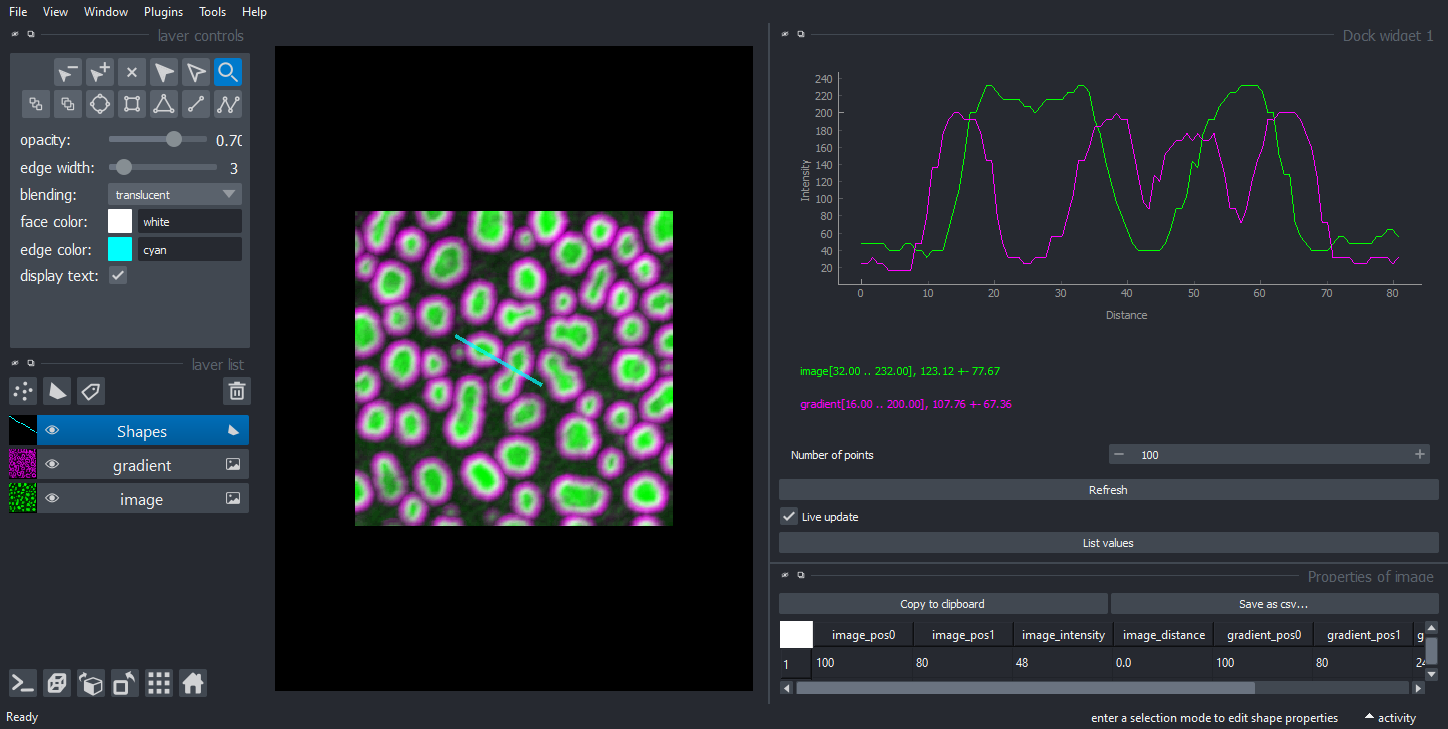

In [8]:
napari.utils.nbscreenshot(viewer)

In [9]:
table = profiler.to_table()

pd.DataFrame(table)

,image_pos0,image_pos1,image_intensity,image_distance,gradient_pos0,gradient_pos1,gradient_intensity,gradient_distance
0,100,80,48,0.000000,100,80,24,0.000000
1,100,80,48,0.814369,100,80,24,0.814369
2,100,81,48,1.628739,100,81,32,1.628739
3,101,82,48,2.443108,101,82,24,2.443108
4,101,82,48,3.257478,101,82,24,3.257478
...,...,...,...,...,...,...,...,...
95,138,147,56,77.365100,138,147,32,77.365100
96,138,147,56,78.179469,138,147,32,78.179469
97,139,148,64,78.993839,139,148,32,78.993839
98,139,149,64,79.808208,139,149,24,79.808208
